In [1]:
#Importing relevant libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
observations = 1000

xs = np.random.uniform(-10,10, (observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

generated_inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-1, 1, (observations,1))

#set target
generated_targets = 2*xs - 3*zs + 5 + noise

np.savez('TF_intro', inputs=generated_inputs, targets=generated_targets)

In [4]:
#load data
training_data = np.load('TF_intro.npz')

In [7]:
input_size = 2
output_size = 1

model = tf.keras.Sequential([
                            tf.keras.layers.Dense(output_size) #calculating dot product
                            ])

#set learning rate
custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)

#use Stohastic Gradient Descent and L2 Norm loss
model.compile(optimizer=custom_optimizer, loss='mean_squared_error') 

#verbose shows output
model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=2)

Epoch 1/100
32/32 - 0s - loss: 29.7010
Epoch 2/100
32/32 - 0s - loss: 4.6713
Epoch 3/100
32/32 - 0s - loss: 1.4783
Epoch 4/100
32/32 - 0s - loss: 0.6522
Epoch 5/100
32/32 - 0s - loss: 0.4149
Epoch 6/100
32/32 - 0s - loss: 0.3548
Epoch 7/100
32/32 - 0s - loss: 0.3349
Epoch 8/100
32/32 - 0s - loss: 0.3278
Epoch 9/100
32/32 - 0s - loss: 0.3264
Epoch 10/100
32/32 - 0s - loss: 0.3269
Epoch 11/100
32/32 - 0s - loss: 0.3277
Epoch 12/100
32/32 - 0s - loss: 0.3390
Epoch 13/100
32/32 - 0s - loss: 0.3340
Epoch 14/100
32/32 - 0s - loss: 0.3270
Epoch 15/100
32/32 - 0s - loss: 0.3275
Epoch 16/100
32/32 - 0s - loss: 0.3242
Epoch 17/100
32/32 - 0s - loss: 0.3295
Epoch 18/100
32/32 - 0s - loss: 0.3332
Epoch 19/100
32/32 - 0s - loss: 0.3275
Epoch 20/100
32/32 - 0s - loss: 0.3335
Epoch 21/100
32/32 - 0s - loss: 0.3317
Epoch 22/100
32/32 - 0s - loss: 0.3289
Epoch 23/100
32/32 - 0s - loss: 0.3278
Epoch 24/100
32/32 - 0s - loss: 0.3270
Epoch 25/100
32/32 - 0s - loss: 0.3254
Epoch 26/100
32/32 - 0s - loss: 0

In [12]:
#Extract weight 
weights = model.layers[0].get_weights()[0]
weights

array([[ 1.979785],
       [-2.994393]], dtype=float32)

In [11]:
#Extract bias
bias = model.layers[0].get_weights()[1]
bias

array([5.0349264], dtype=float32)

In [13]:
#Making predictions
model.predict_on_batch(training_data['inputs']).round(1)

array([[  9. ],
       [ 42. ],
       [-10.7],
       [ 28.7],
       [-13.6],
       [ 19.8],
       [ -5.9],
       [ -6.5],
       [ -7.1],
       [ 19.4],
       [-27.1],
       [ -1. ],
       [-25.9],
       [ -4.9],
       [ 34.2],
       [-15.2],
       [ 19.5],
       [ -5. ],
       [ 14.8],
       [ 32. ],
       [-16.5],
       [ 22.3],
       [  0.4],
       [ -6.6],
       [  3.8],
       [ -3.5],
       [-15.6],
       [-32.9],
       [-13.4],
       [ 21.9],
       [ -1.4],
       [-25.4],
       [ -9.2],
       [ 14.3],
       [ 34.8],
       [-12.3],
       [ -9.2],
       [ 16.4],
       [-20.8],
       [-28.4],
       [ 27.4],
       [ -0.2],
       [ 19.3],
       [-29.6],
       [ -6.1],
       [-36.5],
       [ 15.9],
       [-12.6],
       [-31.2],
       [ 23.1],
       [ -4. ],
       [ 22.9],
       [-40.2],
       [ 20.8],
       [-33.8],
       [ 22.9],
       [ -4.1],
       [ 16.3],
       [-28.9],
       [ 44. ],
       [-25. ],
       [  3.3],
       [

In [14]:
training_data['targets'].round(1)

array([[  9.9],
       [ 43.1],
       [-10.8],
       [ 29.1],
       [-14.3],
       [ 19.5],
       [ -5.9],
       [ -6.9],
       [ -8. ],
       [ 19. ],
       [-26.4],
       [ -1.9],
       [-26.9],
       [ -5.3],
       [ 33.2],
       [-14.8],
       [ 20.4],
       [ -4.9],
       [ 15.2],
       [ 31.2],
       [-16.1],
       [ 22.7],
       [  1.1],
       [ -6.1],
       [  2.8],
       [ -4. ],
       [-15. ],
       [-32.7],
       [-13.1],
       [ 21.5],
       [ -1.6],
       [-26.3],
       [-10.1],
       [ 15.3],
       [ 35.2],
       [-12.4],
       [-10.2],
       [ 15.7],
       [-21.6],
       [-29.1],
       [ 28. ],
       [  0. ],
       [ 19.2],
       [-30.2],
       [ -7.1],
       [-36.6],
       [ 16.4],
       [-13.2],
       [-30.4],
       [ 22.3],
       [ -3.4],
       [ 22.6],
       [-40.1],
       [ 20.5],
       [-33.7],
       [ 23.1],
       [ -4.9],
       [ 15.5],
       [-29.2],
       [ 44.1],
       [-25.8],
       [  4.2],
       [

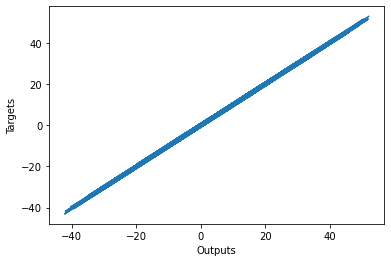

In [15]:
#Plot data to see if we can achieve 45 degree line 
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('Outputs')
plt.ylabel('Targets')
plt.show()